In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [2]:
df = pd.read_csv("BTC_USD_2014-11-03_2021-11-08-CoinDesk.csv", index_col='Date')
df.index = pd.to_datetime(df.index)

df.tail(10)

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-10-26,BTC,60399.734933,63080.305703,63276.547846,59925.126116
2021-10-27,BTC,58602.202535,60329.938740,61486.427448,58108.911168
2021-10-28,BTC,60619.266944,58476.184714,62450.034023,57965.311022
2021-10-29,BTC,62302.705092,60600.419445,62979.128248,60239.030204
2021-10-30,BTC,61342.601551,62251.243490,62356.987743,60796.371434
2021-10-31,BTC,61374.278373,61896.533332,62426.366335,60007.903334
2021-11-01,BTC,61200.225752,61348.170824,62331.429905,59520.505066
2021-11-06,BTC,61469.973676,61059.916747,61559.970200,60168.199228
2021-11-07,BTC,62924.521859,61540.163923,63120.326920,61410.068562


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2559 entries, 2014-11-03 to 2021-11-08
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2559 non-null   object 
 1   Closing Price (USD)  2559 non-null   float64
 2   24h Open (USD)       2559 non-null   float64
 3   24h High (USD)       2559 non-null   float64
 4   24h Low (USD)        2559 non-null   float64
dtypes: float64(4), object(1)
memory usage: 120.0+ KB


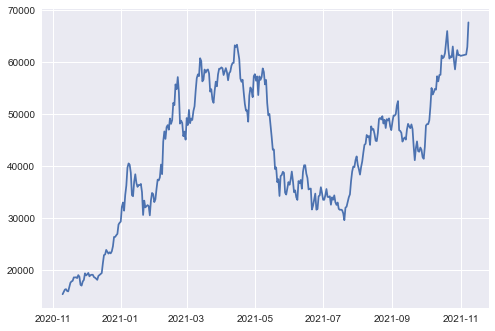

In [4]:
n = 360

plt.plot(df["Closing Price (USD)"][-n:])

In [5]:
s = df["Closing Price (USD)"][-n:].to_numpy()

In [6]:
def sma(s, i, w):
    return np.average(s[i - w: i])


def ema(s, i, w):
    a = 2 / (w + 1)
    if w == 0:
        return s[i]
    else:
        return a * s[i - 1] + (1 - a) * ema(s, i - 1, w - 1)

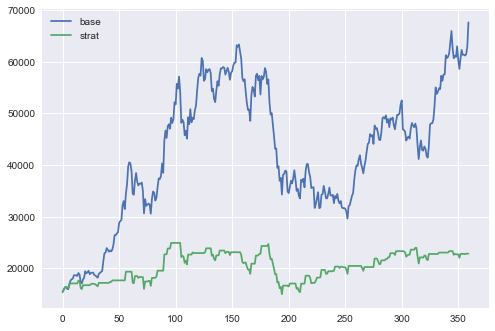

In [7]:
w = 2

v = np.zeros(n)
v[0] = s[0]

for i in range(1, w + 1):
    v[i] = (s[i] / s[i - 1]) * v[i - 1]

for i in range(w + 1, n):
    if s[i - 1] < sma(s, i - 1, w):
        v[i] = (s[i] / s[i - 1]) * v[i - 1]
    else:
        v[i] = v[i - 1]

plt.plot(s, label="base")
plt.plot(v, label="strat")
plt.legend()

1.9003380945431805
0.6648459379988908


(array([  1.,   2.,   0.,   4.,   4.,   7.,   9.,  13.,  15., 241.,  22.,
         13.,   9.,   5.,   5.,   5.,   3.,   0.,   0.,   1.]),
 array([-0.13427552, -0.12002753, -0.10577954, -0.09153155, -0.07728357,
        -0.06303558, -0.04878759, -0.0345396 , -0.02029161, -0.00604362,
         0.00820437,  0.02245235,  0.03670034,  0.05094833,  0.06519632,
         0.07944431,  0.0936923 ,  0.10794029,  0.12218827,  0.13643626,
         0.15068425]),
 <BarContainer object of 20 artists>)

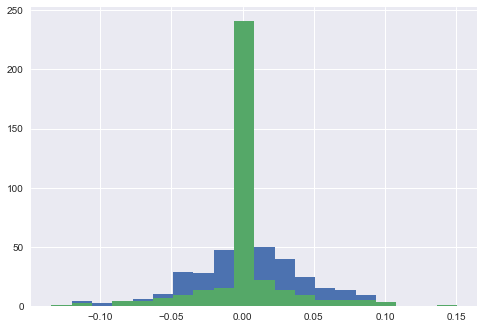

In [8]:
r = np.log(s[1:] / np.roll(s, 1)[1:])
vol = r.std() * np.sqrt(n)
mu = np.average(r) * n
print((mu - 0.02) / vol)
plt.hist(r, bins=20)

r = np.log(v[1:] / np.roll(v, 1)[1:])
vol = r.std() * np.sqrt(n)
mu = np.average(r) * n
print((mu - 0.02) / vol)
plt.hist(r, bins=20)

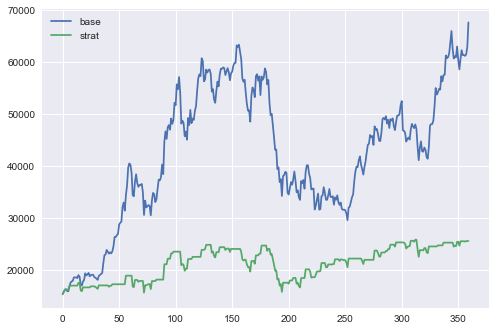

In [9]:
v = np.zeros(n)
v[0] = s[0]

for i in range(1, w + 1):
    v[i] = (s[i] / s[i - 1]) * v[i - 1]

for i in range(w + 1, n):
    if s[i - 1] < ema(s, i - 1, 2):
        v[i] = (s[i] / s[i - 1]) * v[i - 1]
    else:
        v[i] = v[i - 1]

plt.plot(s, label="base")
plt.plot(v, label="strat")
plt.legend()

1.9003380945431805
0.8750828323395933


(array([  1.,   2.,   0.,   3.,   4.,   7.,  10.,  13.,  17., 237.,  22.,
         15.,   9.,   5.,   5.,   5.,   3.,   0.,   0.,   1.]),
 array([-0.13427552, -0.12002753, -0.10577954, -0.09153155, -0.07728357,
        -0.06303558, -0.04878759, -0.0345396 , -0.02029161, -0.00604362,
         0.00820437,  0.02245235,  0.03670034,  0.05094833,  0.06519632,
         0.07944431,  0.0936923 ,  0.10794029,  0.12218827,  0.13643626,
         0.15068425]),
 <BarContainer object of 20 artists>)

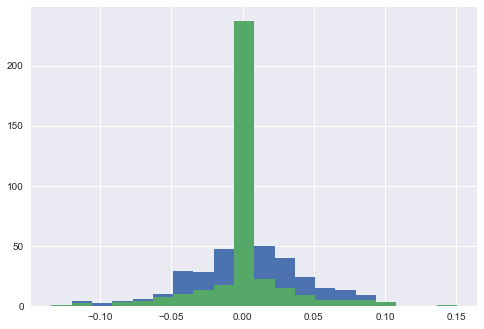

In [10]:
r = np.log(s[1:] / np.roll(s, 1)[1:])
vol = r.std() * np.sqrt(n)
mu = np.average(r) * n
print((mu - 0.02) / vol)
plt.hist(r, bins=20)

r = np.log(v[1:] / np.roll(v, 1)[1:])
vol = r.std() * np.sqrt(n)
mu = np.average(r) * n
print((mu - 0.02) / vol)
plt.hist(r, bins=20)

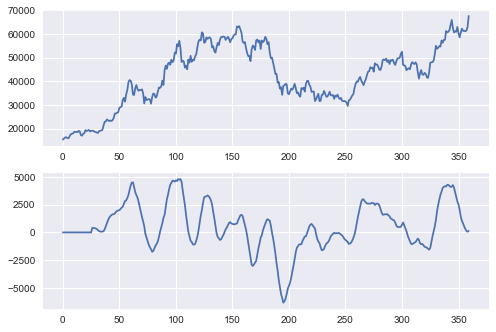

In [11]:
macd = np.zeros(n)

for i in range(n):
    if i >= 26:
        macd[i] = ema(s, i, 12) - ema(s, i, 26)

fig, axs = plt.subplots(2)
axs[0].plot(s, label="Spot")
axs[1].plot(macd, label="MACD")